In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/bds_hn_data_cleaned.csv'
df = pd.read_csv(file_path)

In [13]:
print(df.head())

  published_date            location              home_type  price   area  \
0     07/10/2025     Gia Lâm, Hà Nội        căn hộ chung cư   4.72   75.0   
1     07/10/2025    Đông Anh, Hà Nội                    đất   4.28   72.0   
2     07/10/2025  Đan Phượng, Hà Nội  nhà biệt thự, liền kề  38.30  288.0   
3     07/10/2025     Gia Lâm, Hà Nội        căn hộ chung cư   2.75   43.0   
4     07/10/2025     Đống Đa, Hà Nội              nhà riêng   3.85   18.0   

   bedroom   wc      legal_status         furniture  
0      3.0  2.0  có sổ đỏ/sổ hồng            Đầy đủ  
1      3.0  3.0  không có - Thiếu  Không có - Thiếu  
2      3.0  3.0  không có - Thiếu  Không có - Thiếu  
3      1.0  3.0  có sổ đỏ/sổ hồng  Không có - Thiếu  
4      2.0  1.0  có sổ đỏ/sổ hồng  Không có - Thiếu  


Co giãn

In [16]:
import numpy as np

# Các cột số để co giãn
numeric_cols = ['price', 'area', 'bedroom', 'wc']

# Co giãn
for col in numeric_cols:
    min_values = df[col].min()
    max_values = df[col].max()

    if (max_values - min_values) != 0:
        # Gán thẳng kết quả co giãn vào cột cũ
        df.loc[:, col] = [(x - min_values) / (max_values - min_values) for x in df[col]]
    else:
        df.loc[:, col] = 0 # Nếu min = max, gán 0

print("Mô tả các cột số của 'df' sau khi co giãn:")
print(df[numeric_cols].describe())

Mô tả các cột số của 'df' sau khi co giãn:
             price         area      bedroom           wc
count  3709.000000  3709.000000  3709.000000  3709.000000
mean      0.140200     0.258579     0.294857     0.165709
std       0.140843     0.165718     0.163390     0.101969
min       0.000000     0.000000     0.000000     0.000000
25%       0.058792     0.144543     0.250000     0.076923
50%       0.096297     0.218289     0.250000     0.153846
75%       0.160592     0.312684     0.375000     0.153846
max       1.000000     1.000000     1.000000     1.000000


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

Biểu đồ

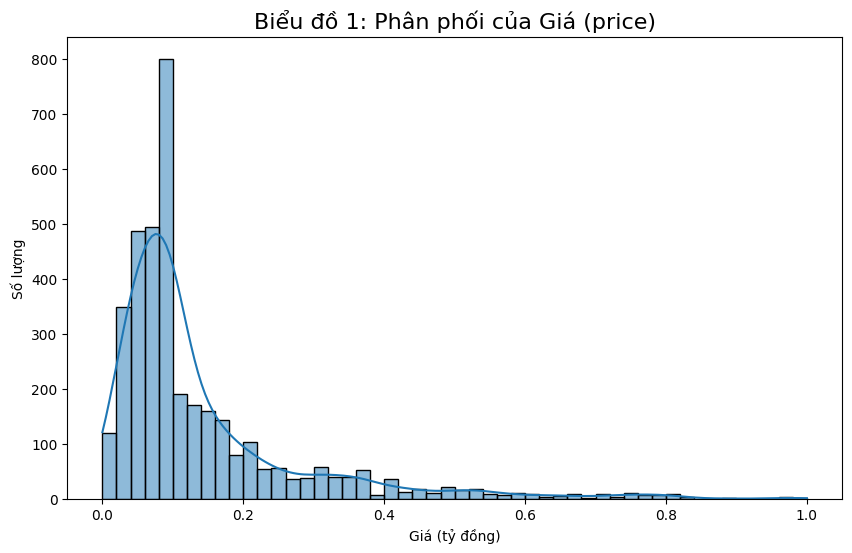

In [20]:
# Biểu đồ 1: Phân phối của giá (price)
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Biểu đồ 1: Phân phối của Giá (price)', fontsize=16)
plt.xlabel('Giá (tỷ đồng)')
plt.ylabel('Số lượng')
plt.show()

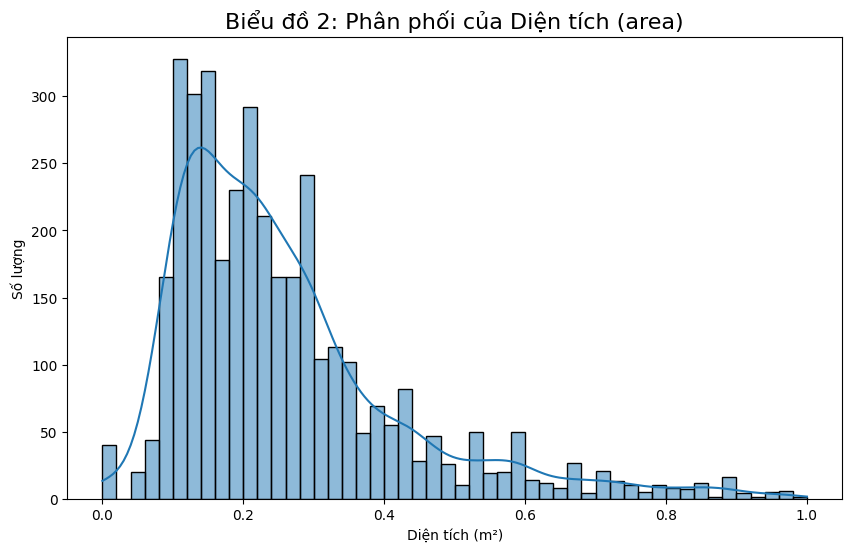

In [21]:
# Biểu đồ 2: Phân phối của diện tích (area)
plt.figure(figsize=(10, 6))
sns.histplot(df['area'], kde=True, bins=50)
plt.title('Biểu đồ 2: Phân phối của Diện tích (area)', fontsize=16)
plt.xlabel('Diện tích (m²)')
plt.ylabel('Số lượng')
plt.show()

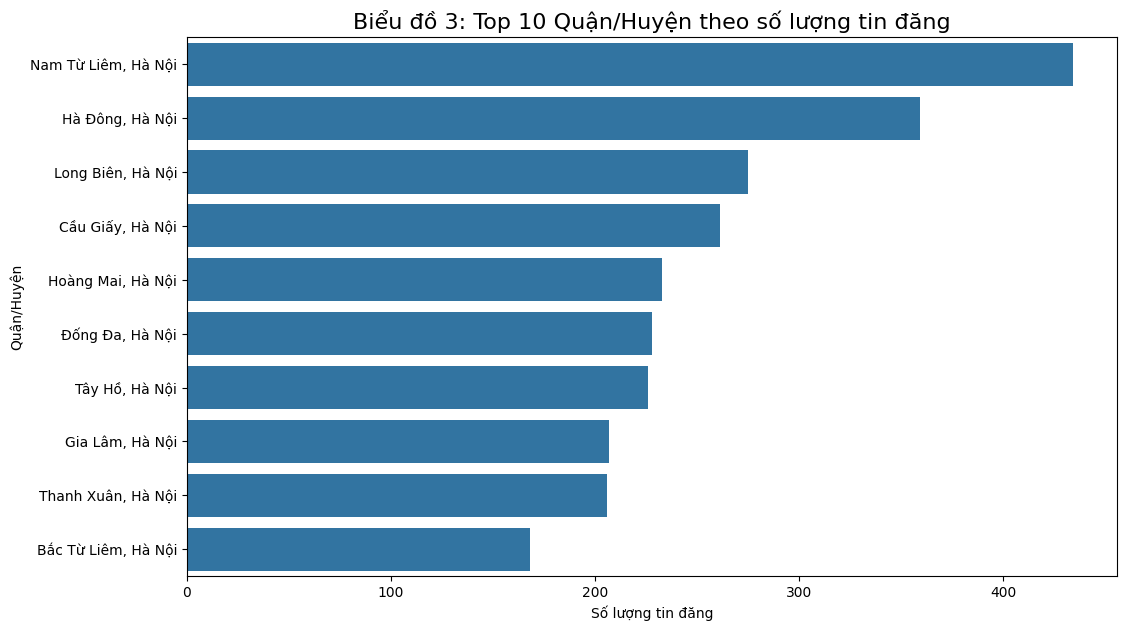

In [22]:
# Biểu đồ 3: 10 Quận/Huyện có nhiều tin đăng nhất
plt.figure(figsize=(12, 7))
top_10_locations = df['location'].value_counts().nlargest(10).index
sns.countplot(data=df[df['location'].isin(top_10_locations)], y='location', order=top_10_locations)
plt.title('Biểu đồ 3: Top 10 Quận/Huyện theo số lượng tin đăng', fontsize=16)
plt.xlabel('Số lượng tin đăng')
plt.ylabel('Quận/Huyện')
plt.show()

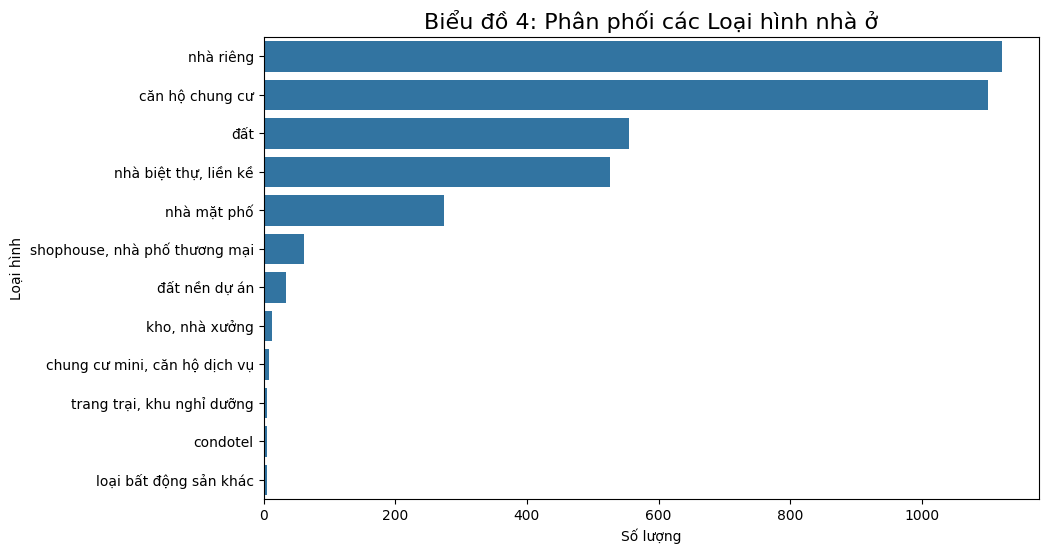

In [23]:
# Biểu đồ 4: Phân phối các loại hình nhà ở (home_type)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='home_type', order=df['home_type'].value_counts().index)
plt.title('Biểu đồ 4: Phân phối các Loại hình nhà ở', fontsize=16)
plt.xlabel('Số lượng')
plt.ylabel('Loại hình')
plt.show()

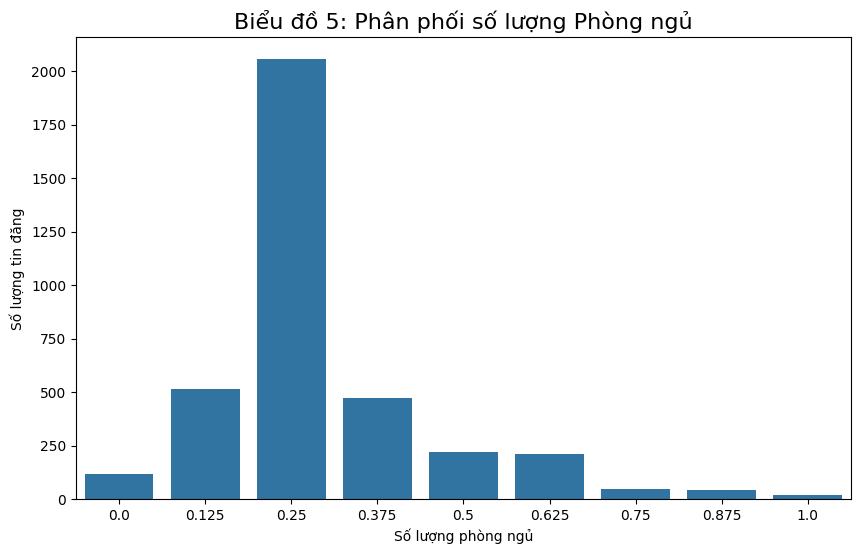

In [37]:
# Biểu đồ 5: Phân phối số lượng phòng ngủ (Countplot đã sắp xếp)
plt.figure(figsize=(10, 6))
# Sắp xếp số phòng ngủ theo thứ tự số tự nhiên
sorted_bedroom_order = sorted(df['bedroom'].unique())
sns.countplot(data=df, x='bedroom', order=sorted_bedroom_order)
plt.title('Biểu đồ 5: Phân phối số lượng Phòng ngủ', fontsize=16)
plt.xlabel('Số lượng phòng ngủ')
plt.ylabel('Số lượng tin đăng')
plt.show()

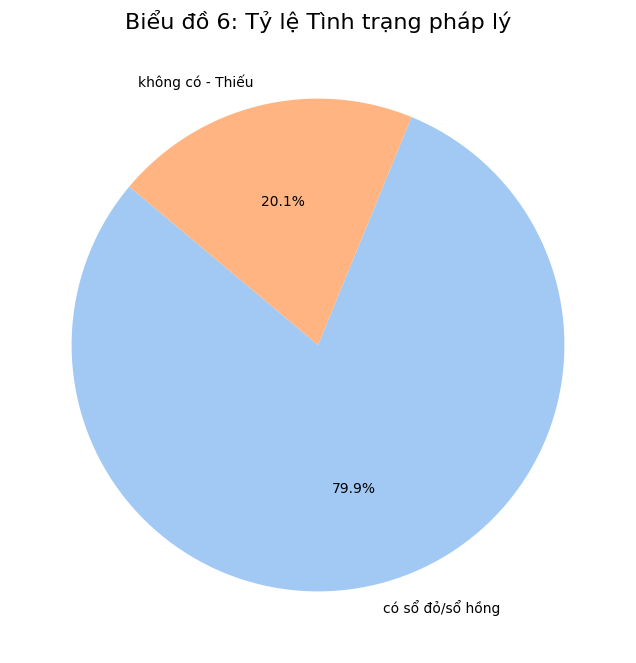

In [39]:
# Biểu đồ 6: Tỷ lệ tình trạng pháp lý (legal_status)
plt.figure(figsize=(8, 8))
legal_counts = df['legal_status'].value_counts()
plt.pie(legal_counts, labels=legal_counts.index, autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette('pastel'))
plt.title('Biểu đồ 6: Tỷ lệ Tình trạng pháp lý', fontsize=16)
plt.show()

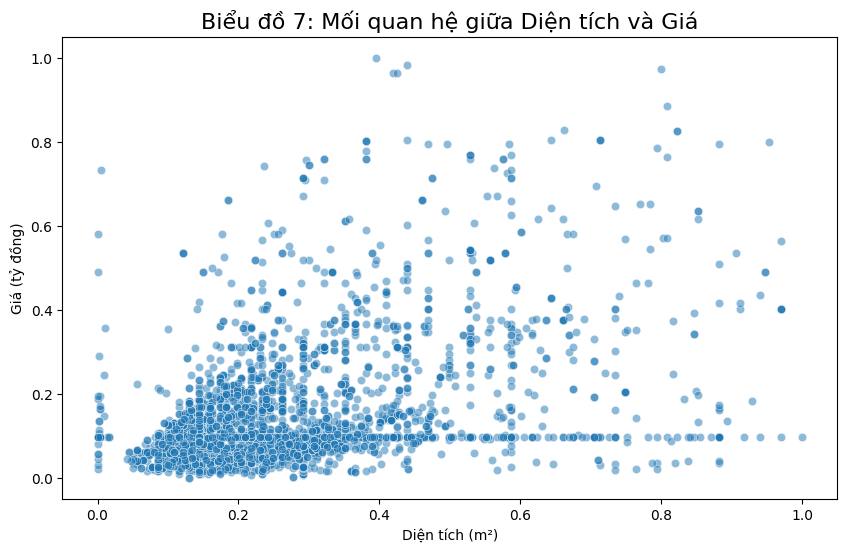

In [38]:
# Biểu đồ 7: Mối quan hệ giữa Diện tích (area) và Giá (price)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='area', y='price', alpha=0.5)
plt.title('Biểu đồ 7: Mối quan hệ giữa Diện tích và Giá', fontsize=16)
plt.xlabel('Diện tích (m²)')
plt.ylabel('Giá (tỷ đồng)')
plt.show()

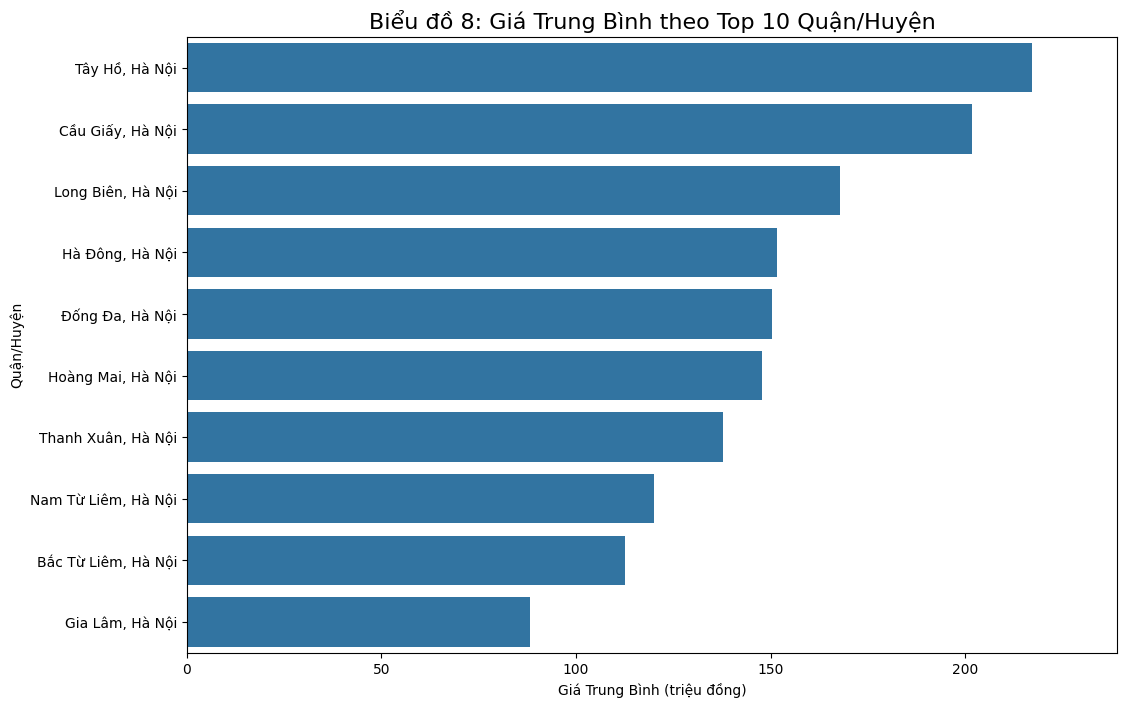

In [70]:
# Biểu đồ 8: Giá Trung Bình theo Quận/Huyện (Top 10)
top_10_order = df['location'].value_counts().nlargest(10).index
df_top10_local = df[df['location'].isin(top_10_order)].copy()
df_top10_local['price'] = df_top10_local['price'] * 1000

plt.figure(figsize=(12, 8))
location_means = df_top10_local.groupby('location')['price'].mean()
location_order = location_means.sort_values(ascending=False).index
plt.xlim(right=location_means.max() * 1.1)
sns.barplot(data=df_top10_local, y='location', x='price', order=location_order, errorbar=None)
plt.title('Biểu đồ 8: Giá Trung Bình theo Top 10 Quận/Huyện', fontsize=16)
plt.xlabel('Giá Trung Bình (triệu đồng)')
plt.ylabel('Quận/Huyện')
plt.show()

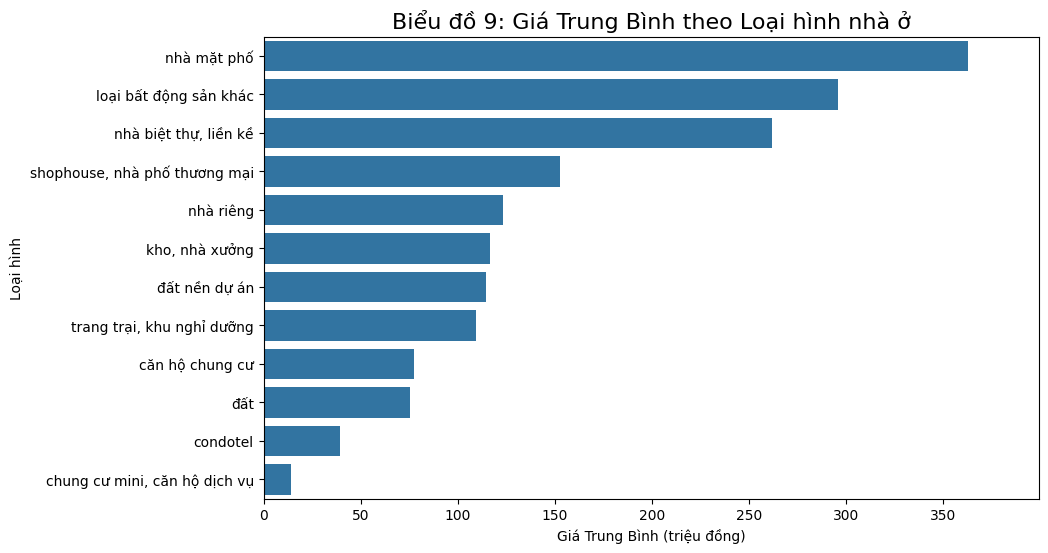

In [71]:
# Biểu đồ 9: Giá Trung Bình theo Loại hình nhà ở
df_local_9 = df.copy()
df_local_9['price'] = df_local_9['price'] * 1000

plt.figure(figsize=(10, 6))
hometype_means = df_local_9.groupby('home_type')['price'].mean()
hometype_order = hometype_means.sort_values(ascending=False).index
plt.xlim(right=hometype_means.max() * 1.1)
sns.barplot(data=df_local_9, y='home_type', x='price', order=hometype_order, errorbar=None)
plt.title('Biểu đồ 9: Giá Trung Bình theo Loại hình nhà ở', fontsize=16)
plt.xlabel('Giá Trung Bình (triệu đồng)')
plt.ylabel('Loại hình')
plt.show()

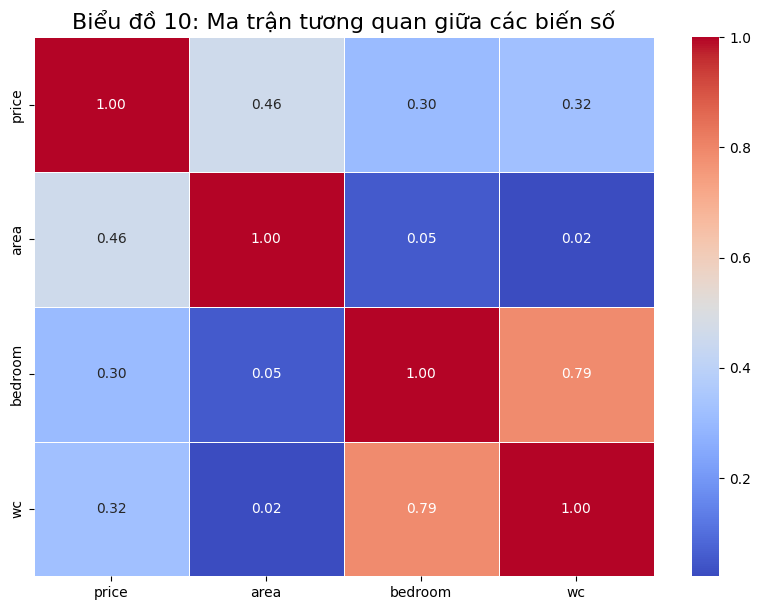

In [78]:
# Biểu đồ 10: Ma trận tương quan (Correlation Heatmap)
plt.figure(figsize=(10, 7))
numeric_cols = ['price', 'area', 'bedroom', 'wc']
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Biểu đồ 10: Ma trận tương quan giữa các biến số', fontsize=16)
plt.show()

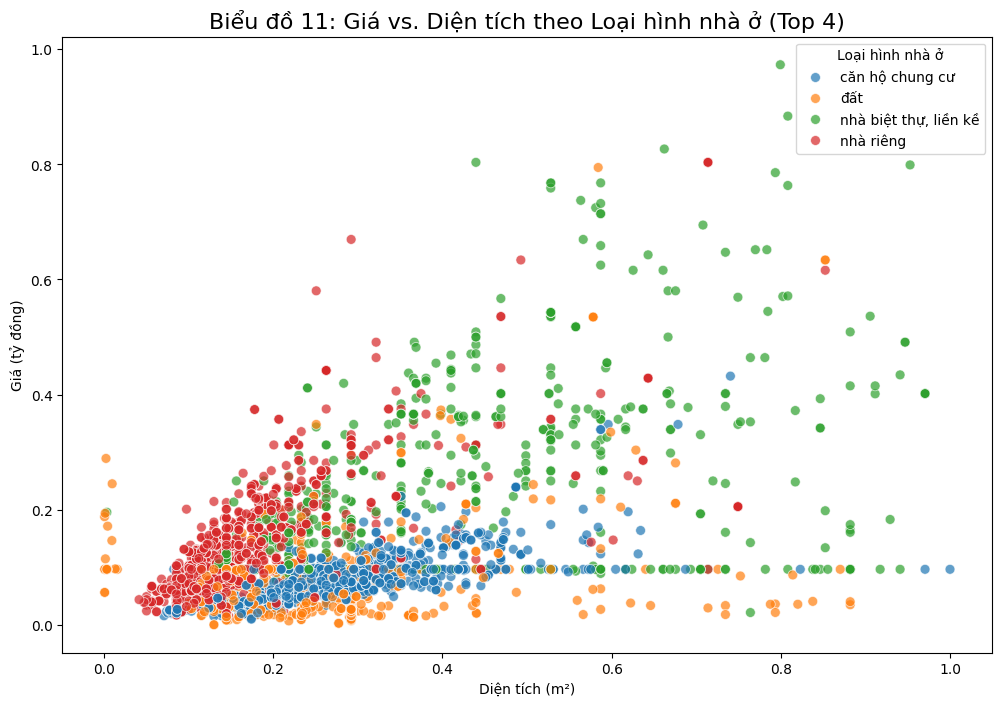

In [77]:
# Biểu đồ 11: Giá vs Diện tích, phân loại theo Loại hình nhà ở
plt.figure(figsize=(12, 8))
# Lọc ra 4 loại hình phổ biến nhất để vẽ
top_4_home_types = df['home_type'].value_counts().nlargest(4).index
df_top4_types = df[df['home_type'].isin(top_4_home_types)]

sns.scatterplot(data=df_top4_types, x='area', y='price', hue='home_type', alpha=0.7, s=50)
plt.title('Biểu đồ 11: Giá vs. Diện tích theo Loại hình nhà ở (Top 4)', fontsize=16)
plt.xlabel('Diện tích (m²)')
plt.ylabel('Giá (tỷ đồng)')
plt.legend(title='Loại hình nhà ở')
plt.show()